In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

In [33]:

df = pd.read_csv(
    "dataset_2020.csv",
    encoding='latin1',
    delimiter=',', 
    usecols=[
        "Cod_Mun", "Mun", "Referencia", "Pes_PBF", "Pes_Cad",
        "F_PBF_Domi", "F_PBF_EP", "F_CAD_EP"
    ]
)

In [22]:
df['Pes_PBF'] = pd.to_numeric(df['Pes_PBF'], errors='coerce')
df['F_PBF_EP'] = pd.to_numeric(df['F_PBF_EP'], errors='coerce')
df['F_CAD_EP'] = pd.to_numeric(df['F_CAD_EP'], errors='coerce')
df['F_PBF_Domi'] = pd.to_numeric(df['F_PBF_Domi'], errors='coerce')


In [34]:
print(df[['F_PBF_Domi']].isna().sum())

F_PBF_Domi    0
dtype: int64


In [29]:
df_clean = df.dropna(subset=['F_PBF_Domi'])

In [5]:
print(df.columns)
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.columns)

Index(['Cod_Mun', 'Mun', 'Referencia', 'Pes_PBF', 'Pes_Cad', 'F_PBF_Domi',
       'F_PBF_EP', 'F_CAD_EP'],
      dtype='object')
Index(['Cod_Mun', 'Mun', 'Referencia', 'Pes_PBF', 'Pes_Cad', 'F_PBF_Domi',
       'F_PBF_EP', 'F_CAD_EP'],
      dtype='object')


In [25]:
# Filtrar municípios onde F_PBF_EP > F_CAD_EP
municipios_bf_maior_cad = df[df['F_PBF_EP'] > df['F_CAD_EP']][['Mun', 'F_PBF_EP', 'F_CAD_EP']]

# Mostrar os resultados
print(municipios_bf_maior_cad)


Empty DataFrame
Columns: [Mun, F_PBF_EP, F_CAD_EP]
Index: []


In [ ]:
#1. Quais municípios estão atendendo menos da metade das famílias de baixa renda cadastradas?

municipios_menos_50 = df[df['F_PBF_EP'] / df['F_CAD_EP'] < 0.5][['Mun', 'F_PBF_EP', 'F_CAD_EP']].drop_duplicates()

# Mostrar os resultados
print(municipios_menos_50)

                       Mun  F_PBF_EP  F_CAD_EP
14       Ãlvares Florence      56.0     161.0
52            Bady Bassitt      75.0     164.0
147              CruzÃ¡lia      49.0     278.0
638   Vista Alegre do Alto       5.0      16.0
659      Ãlvares Florence      75.0     163.0
...                    ...       ...       ...
7252         DolcinÃ³polis      63.0     138.0
7403              Louveira     883.0    2106.0
7405         LucianÃ³polis      45.0     111.0
7512              Pedreira     867.0    1759.0
7601              Saltinho      49.0     105.0

[64 rows x 3 columns]


In [ ]:
#2. Qual é o impacto real do Bolsa Família na redução da pobreza extrema em São Paulo, considerando a porcentagem de famílias cobertas em relação às cadastradas?

impacto_estadual = (df['F_PBF_EP'].sum() / df['F_CAD_EP'].sum()) * 100

print(f"O impacto estadual do Bolsa Família na redução da pobreza extrema é: {impacto_estadual:.2f}%")


O impacto estadual do Bolsa Família na redução da pobreza extrema é: 70.29%


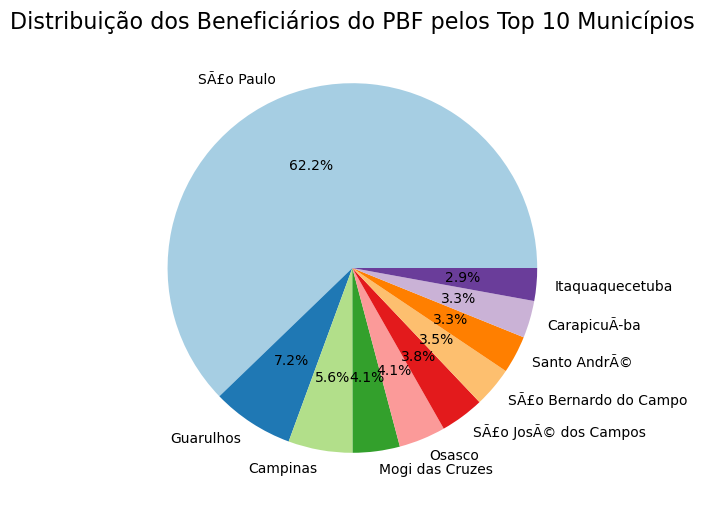

In [6]:
# Top 10 municípios por número de beneficiários do PBF
top_10_pbf = (
    df[['Mun', 'Pes_PBF']]       
    .drop_duplicates(subset='Mun')     
    .nlargest(10, 'Pes_PBF')            
)

plt.figure(figsize=(6, 6))
plt.pie(top_10_pbf['Pes_PBF'], labels=top_10_pbf['Mun'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)


plt.title('Distribuição dos Beneficiários do PBF pelos Top 10 Municípios', fontsize=16)
plt.show()

c:\Users\jessi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


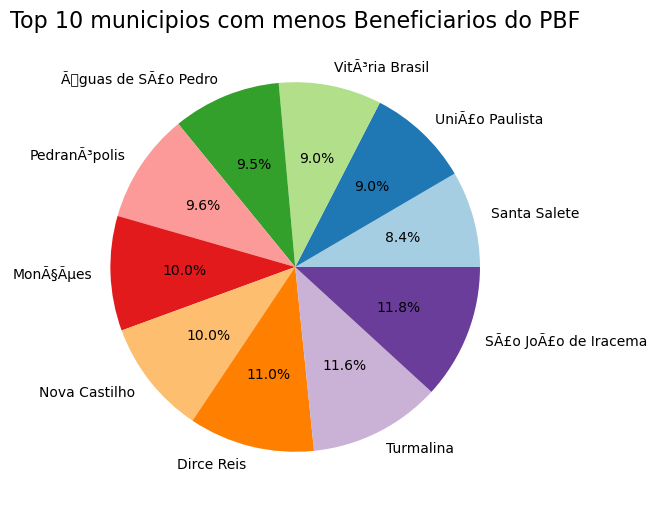

In [ ]:
# Top 10 municipios com menos Beneficiarios do PBF
top_10_pbf = (
    df[['Mun', 'Pes_PBF']]       
    .drop_duplicates(subset='Mun')     
    .nsmallest(10, 'Pes_PBF')            
)

plt.figure(figsize=(6, 6))
plt.pie(top_10_pbf['Pes_PBF'], labels=top_10_pbf['Mun'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)


plt.title('Top 10 municipios com menos Beneficiarios do PBF', fontsize=16)
plt.show()